<a href="https://colab.research.google.com/github/CaioBuard/A3-Analise-de-Dados/blob/main/Analise_Football_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
arquivo = pd.read_csv('datafm20 (1).csv')

In [3]:
arquivo = arquivo.rename(columns={'Unnamed: 0': 'ID'})


In [48]:
linhaColuna = arquivo.shape
print(linhaColuna)

print(f"Número de linhas do DataFrame: {linhaColuna[0]}")

(144750, 64)
Número de linhas do DataFrame: 144750


In [5]:
display(arquivo)

,ID,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170.0,72.0,32.0,...,18.0,2.0,2.0,10.0,19.0,19.0,19.0,7.0,2.0,18.0
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185.0,83.0,34.0,...,14.0,4.0,1.0,16.0,14.0,18.0,13.0,6.0,2.0,15.0
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178.0,73.0,20.0,...,18.0,2.0,1.0,12.0,14.0,17.0,16.0,6.0,4.0,20.0
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192.0,90.0,33.0,...,20.0,12.0,17.0,14.0,14.0,19.0,15.0,8.0,14.0,13.0
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175.0,68.0,27.0,...,17.0,3.0,1.0,14.0,14.0,16.0,18.0,10.0,4.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49859,49859,Fethi Ãzer,D (C),Boluspor,Turkish 1. League,Turkey (1. League),TUR,185.0,79.0,22.0,...,7.0,2.0,2.0,9.0,7.0,8.0,7.0,8.0,1.0,13.0
49860,49860,Fevzi Elmas,GK,Unknown,Unknown,Turkey,TUR,182.0,84.0,36.0,...,9.0,10.0,13.0,11.0,11.0,11.0,11.0,8.0,9.0,8.0
49861,49861,Fidel,ST (C),Busan FC,Unknown,South Korea,BRA,176.0,70.0,25.0,...,11.0,2.0,1.0,8.0,6.0,12.0,12.0,7.0,1.0,12.0
49862,49862,Filip Bajic,WB/AM (RL),Unknown,Unknown,Serbia,SRB,170.0,72.0,25.0,...,11.0,1.0,1.0,12.0,8.0,11.0,11.0,12.0,1.0,12.0


In [8]:
arquivo ['Height'] = arquivo['Height'].astype(float)
arquivo['Height'] = arquivo['Height'] / 100

In [9]:
grupos_de_posicoes = arquivo.groupby('Best Pos')

In [21]:
display(grupos_de_posicoes.size())

Best Pos
AM (C)    3323
AM (L)    3430
AM (R)    3538
D (C)     7827
D (L)     3258
D (R)     3639
DM        3541
GK        4734
M (C)     6494
M (L)     1089
M (R)     1089
ST (C)    7550
WB (L)     192
WB (R)     159
dtype: int64

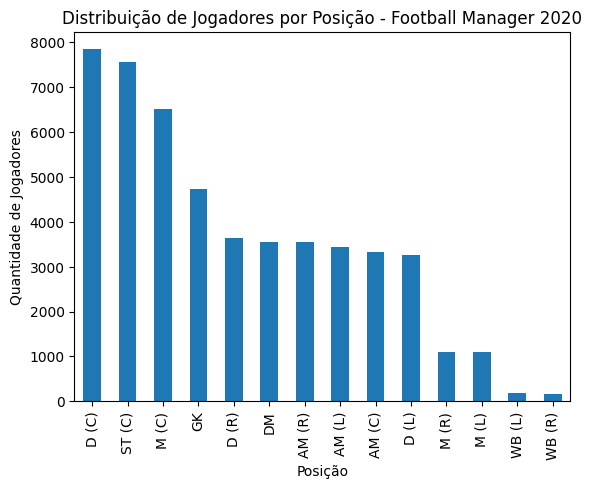

In [11]:
contagem_posicoes = arquivo['Best Pos'].value_counts()

contagem_posicoes.plot(kind='bar')

plt.title("Distribuição de Jogadores por Posição - Football Manager 2020")

plt.xlabel("Posição")
plt.ylabel("Quantidade de Jogadores")

plt.show()


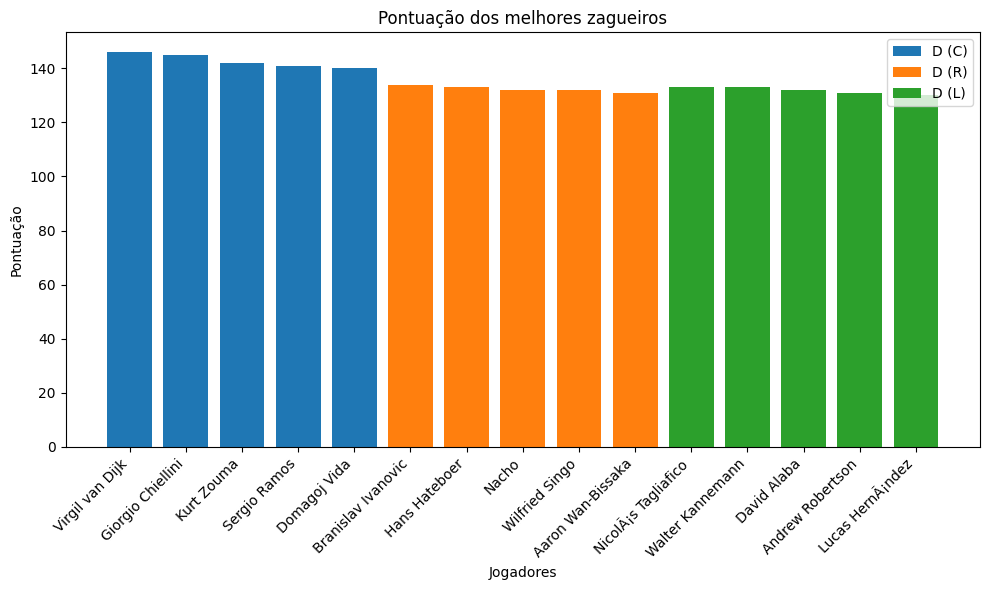

In [42]:
posicoes_desejadas = ["D (C)", "D (R)", "D (L)"]
atributos = ['Acc', 'Pac', 'Jum', 'Str', 'Det', 'Cnt', 'Ant', 'Wor', 'Tck']

def melhores_jogadores_por_posicao(df, posicao, atributos):
    df_pos = arquivo[arquivo['Best Pos'] == posicao].copy()
    df_pos['Soma_Atributos'] = df_pos[atributos].sum(axis=1)
    colunas_interesse = ['Name', 'Best Pos'] + atributos + ['Soma_Atributos']
    return df_pos.nlargest(5, 'Soma_Atributos')[colunas_interesse]

resultados = {}

for posicao in posicoes_desejadas:
    resultados[posicao] = melhores_jogadores_por_posicao(arquivo, posicao, atributos)

fig, ax = plt.subplots(figsize=(10, 6))

for posicao, jogadores in resultados.items():
    ax.bar(jogadores['Name'], jogadores['Soma_Atributos'], label=posicao)

ax.set_xlabel('Jogadores')
ax.set_ylabel('Pontuação')
ax.set_title('Pontuação dos melhores zagueiros')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


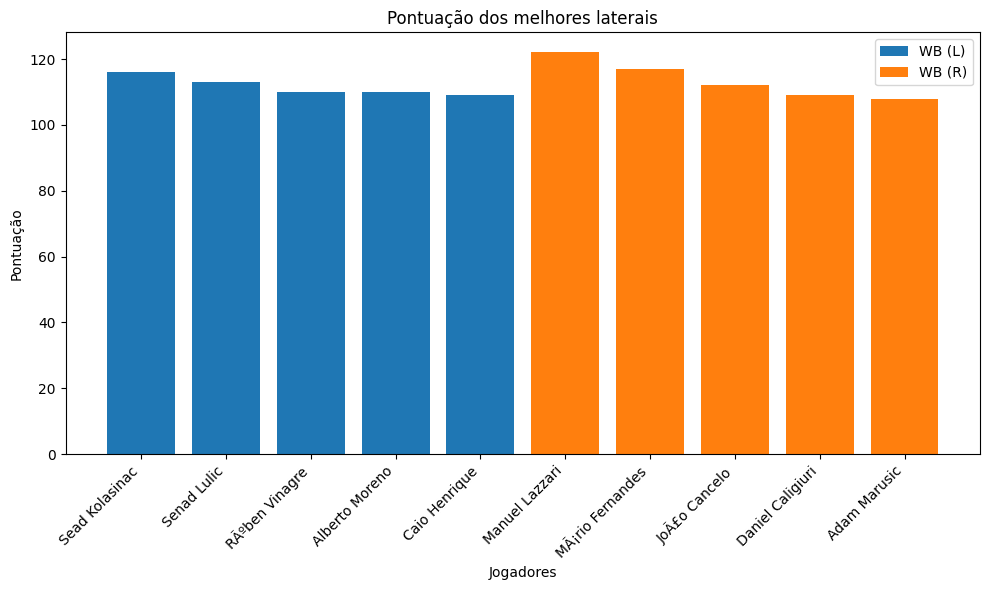

In [47]:
arquivo = pd.read_csv('datafm20 (1).csv', encoding='utf-8')

posicoes_wb_desejadas = ["WB (L)", "WB (R)"]
atributos_wb = ['Acc', 'Pac', 'Agi', 'Det', 'Cnt', 'Ant', 'Wor', 'Dri']

def calcular_pontuacao_jogadores(df, posicoes, atributos):
    resultados = {}
    for posicao in posicoes:
        df_posicao = df[df['Best Pos'] == posicao].copy()
        df_posicao['Pontuacao'] = df_posicao[atributos].sum(axis=1)
        resultados[posicao] = df_posicao[['Name', 'Pontuacao']].nlargest(5, 'Pontuacao')
    return resultados

resultados_wb = calcular_pontuacao_jogadores(arquivo, posicoes_wb_desejadas, atributos_wb)

fig, ax = plt.subplots(figsize=(10, 6))

for posicao, jogadores in resultados_wb.items():
    ax.bar(jogadores['Name'], jogadores['Pontuacao'], label=posicao)

ax.set_xlabel('Jogadores')
ax.set_ylabel('Pontuação')
ax.set_title('Pontuação dos melhores laterais')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


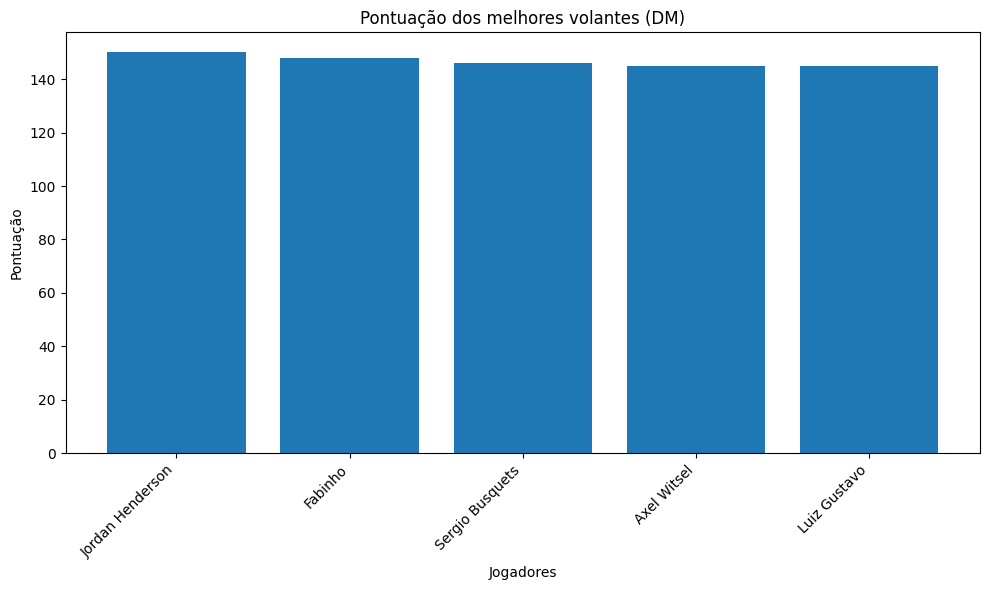

In [43]:
posicao_dm_desejada = "DM"
atributos_dm = ['Acc', 'Pac', 'Jum', 'Str', 'Det', 'Cnt', 'Ant', 'Wor', 'Dri', 'Pas']

def melhores_jogadores_por_posicao(df, posicao, atributos):
    df_pos = arquivo[arquivo['Best Pos'] == posicao].copy()
    df_pos['Soma_Atributos'] = df_pos[atributos].sum(axis=1)
    colunas_interesse = ['Name', 'Best Pos'] + atributos + ['Soma_Atributos']
    return df_pos.nlargest(5, 'Soma_Atributos')[colunas_interesse]

resultados_dm = melhores_jogadores_por_posicao(arquivo, posicao_dm_desejada, atributos_dm)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(resultados_dm['Name'], resultados_dm['Soma_Atributos'])

ax.set_xlabel('Jogadores')
ax.set_ylabel('Pontuação')
ax.set_title(f'Pontuação dos melhores volantes ({posicao_dm_desejada})')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


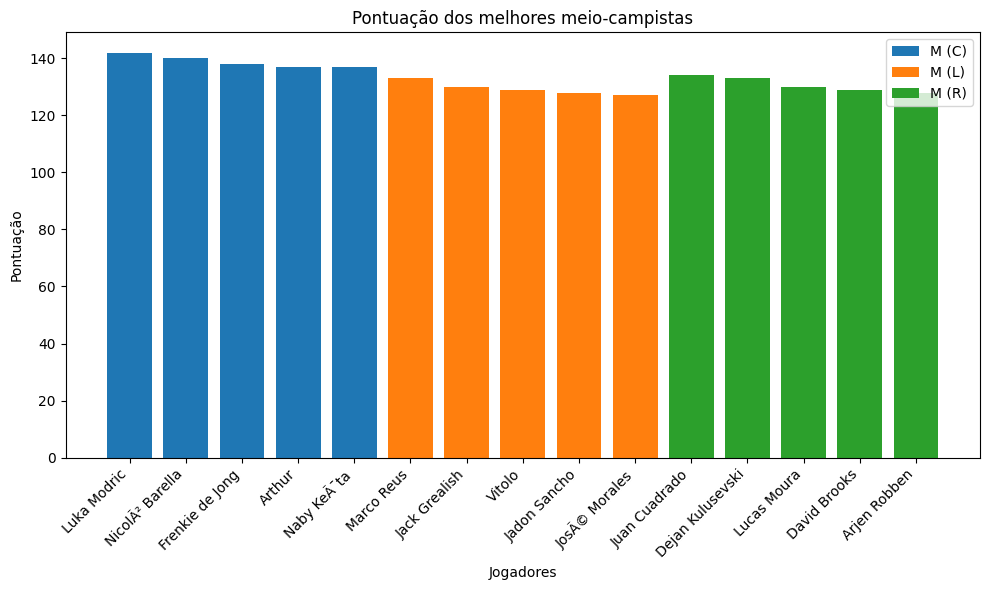

In [44]:
posicoes_m_desejadas = ["M (C)", "M (L)", "M (R)"]
atributos_m = ['Acc', 'Pac', 'Agi', 'Det', 'Cnt', 'Ant', 'Wor', 'Dri', 'Pas']

def melhores_jogadores_por_posicao(df, posicao, atributos):
    df_pos = arquivo[arquivo['Best Pos'] == posicao].copy()
    df_pos['Soma_Atributos'] = df_pos[atributos].sum(axis=1)
    colunas_interesse = ['Name', 'Best Pos'] + atributos + ['Soma_Atributos']
    return df_pos.nlargest(5, 'Soma_Atributos')[colunas_interesse]

resultados_m = {}

for posicao in posicoes_m_desejadas:
    resultados_m[posicao] = melhores_jogadores_por_posicao(arquivo, posicao, atributos_m)

fig, ax = plt.subplots(figsize=(10, 6))

for posicao, jogadores in resultados_m.items():
    ax.bar(jogadores['Name'], jogadores['Soma_Atributos'], label=posicao)

ax.set_xlabel('Jogadores')
ax.set_ylabel('Pontuação')
ax.set_title('Pontuação dos melhores meio-campistas')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


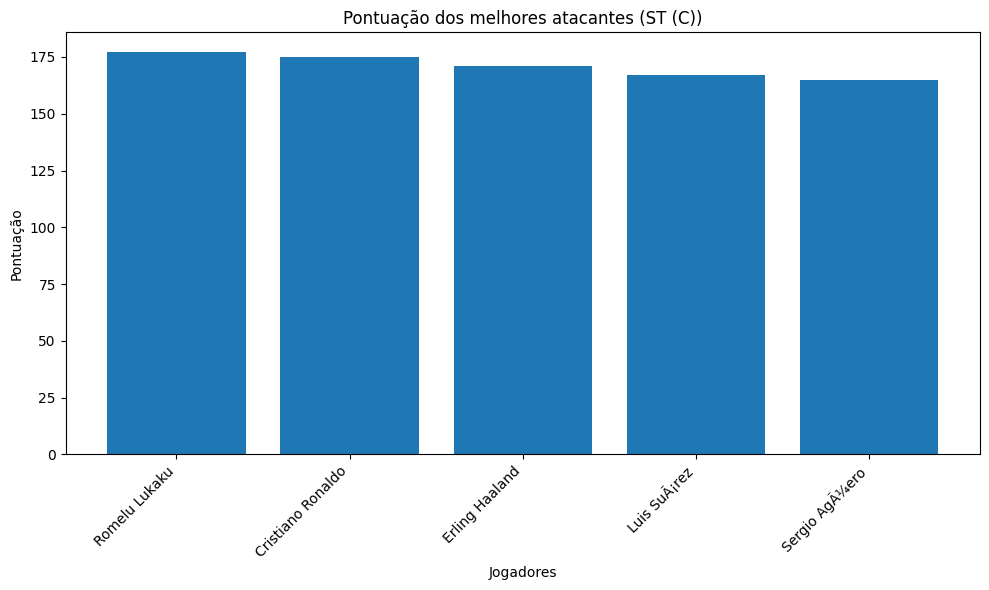

In [45]:
posicao_s_desejada = "ST (C)"
atributos_s = ['Acc', 'Pac', 'Agi', 'Jum', 'Str', 'Det', 'Cnt', 'Ant', 'Wor', 'Dri', 'Fin']

def melhores_jogadores_por_posicao(df, posicao, atributos):
    df_pos = arquivo[arquivo['Best Pos'] == posicao].copy()
    df_pos['Soma_Atributos'] = df_pos[atributos].sum(axis=1)
    colunas_interesse = ['Name', 'Best Pos'] + atributos + ['Soma_Atributos']
    return df_pos.nlargest(5, 'Soma_Atributos')[colunas_interesse]

resultados_s = melhores_jogadores_por_posicao(arquivo, posicao_s_desejada, atributos_s)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(resultados_s['Name'], resultados_s['Soma_Atributos'])

ax.set_xlabel('Jogadores')
ax.set_ylabel('Pontuação')
ax.set_title(f'Pontuação dos melhores atacantes ({posicao_s_desejada})')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
